# Исследование исторических данных о продажах игр, оценках пользователей и экспертов, жанрах и платформах

**Цели исследования:**

1. Выявления потенциально успешных рыночных сегментов.
2. Подготовка рекомендаций для планирования рекламных кампаний и принятия решений о выпуске новых игровых продуктов на основе выявленных закономерностей.

**Ход исследования**

Данные о продажах игр, оценки пользователей и экспертов, жанры и платформы я получаю их файла `/datasets/games.csv`.<br>
Объем данных, а также их качество и содержание не известно, поэтому я проверю данные на ошибки и оценю их влияние на исследование. Далее, я посчитайте суммарные продажи во всех регионах и запишиту их в отдельный столбец.<br>
Следующим шагом будет исследовательский анализ рынка компьютерных игр и платформ.<br>
Далее я составлю портрет пользователя каждого региона.<br>
На следующем шаге я проверю целевые гипотезы.<br>
В конце сформулирую общий вывод.<br>


**Этапы исследования**

- Откытие файла и изучение общей информации
- Подготовка данных
- Исследовательский анализ данных
- Составление портретов пользователей каждого региона
- Проверка гипотез
- Общий вывод

#### Откытие файла и изучение общей информации

##### Импорт бибилиотек

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns

##### Считаем CSV-файлы с данными с помощью библиотеки pandas и сохраним их в датафрейм

In [ ]:
df = pd.read_csv('/datasets/games.csv')

##### Изучение общей информации о датасете

Ознакомимся с общей информацией о датасете

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


*В некоторых столбцах требуется обработать пропуски. Также следует отредактировать названия столбцов.*

Выведем первые строки датасета

In [ ]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


*Здесь мы можем видеть пропуски в столбцах Critic_Score, User_Score, Rating. Также User_Score, Year_of_Release	нуждаются в преобразовании типов.*

**Вывод:**
- Датасет успешно получен из файла.
- Требуется обработка названий столбцов.
- Требуется обработка пропусков.
- Требуется преобразование типов.

#### Подготовка данных

##### Замена названий столбцов

Произведем преобразование названий столбцов к нижнему регистру и проверим результат

In [ ]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**Вывод:**
- Столбцы приведены к общему виду.
- Лишних пробелов в названиях не обнаружено.

##### Преобразование столбцов в нужный тип

Столбец `user_score` необходимо из строкового типа преобразовать в числовой с плавающей запятой, так как он содержит количественную харакеристику с не целой частью.

In [ ]:
#df['user_score'] = df['user_score'].astype('float')

Преобазовать типы не удалось, так как помимо числел и nan присутсвует некое tbd. Посмотрим на список уникальных значений в столбце.

In [ ]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Помимо tbd аномальных значений не наблюдается. tbd по некоторым данным может означать "to be determined" или "подлежит определению", другими словами не выставленная оценка. Таким образом на данном этапе можно переопределить на значение -1.

In [ ]:
df['user_score'] = df['user_score'].str.replace('tbd', '-1')

Проверим, что изменение вступило в силу

In [ ]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '-1', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Теперь еще раз преобразуем тип данных.

In [ ]:
df['user_score'] = df['user_score'].astype('float')
df['user_score'].head(5)

0    8.0
1    NaN
2    8.3
3    8.0
4    NaN
Name: user_score, dtype: float64

Все получилось, переходим к следующему столбцу, необходимость преобразования которого связана с тем, что `year_of_release` содержит в себе года, которые не должны иметь не целой части.

In [ ]:
#df['year_of_release'] = df['year_of_release'].astype('int')

Преобразование не удалось, поэтому временно заменим все nan на -1.

In [ ]:
df['year_of_release'] = df['year_of_release'].fillna(-1).astype(int)
df['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000,   -1, 1995,
       1991, 1981, 1987, 1980, 1983])

Преобразование прошло успешно.

**Вывод:**
- Преобразование типов произведено успешно.
- Требуется обработать пропуски.

##### Обработка пропусков

Посмотрим на столбцы, которые требуют доработки.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Начнем со столбца `name`. Получим строки с пустыми значениями там.

In [ ]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Судя по имеющимся данным из таблицы, а также из открытых источников в интернете, первая строка может соответсвовать игре "Sonic the Hedgehog 2", а вторая "M.U.S.H.A.", однако существуют различные нюансы, такие как начало производства, мирового выпуска и региональные особенности, которые могут сбивать с толку при определении «года выпуска», поэтому целесообразным будет удалить эти строку в особенности при условии того, что многие поля остаются также пустыми.

In [ ]:
df = df.dropna(subset=['name'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Проблема со столбцом `genre` также решилась

In [ ]:
df[df['year_of_release'] == -1]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,-1,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,-1,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,-1,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,-1,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,-1,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,-1,Sports,0.01,0.00,0.00,0.00,43.0,-1.0,E10+
16405,Freaky Flyers,GC,-1,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,-1,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,-1,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Мы можем видеть, что некоторые названия игр содержат даты. Возможно получится воспользоваться этим и заполнить пропущенные ячейки столбца year_of_release. Проверим эту гипотезу, посмотрев дату выхода таких игр. Похоже, что гипотеза не подтвердилась, wwe smackdown vs. raw 2006 вышла в 2005 году.

Так как в рамках целей нашего исследования дата создания игры является критичной характеристикой, а также ввиду того, что количество таких игр минимально, принято решение убрать их из датасета.

In [ ]:
df = df.query('year_of_release != -1')

Так как каждая игра по своему уникальна и может координально отличаться от игры в том же возростном сегменте и жанре, то категоризация и получение средних значений для заполнения пропусков в столбцах critic_score и user_score совершенно не уместна. В следствии этого, принято решение заполнить их отрицательными значениями.

In [ ]:
df['critic_score'] = df['critic_score'].fillna(-1.0)

In [ ]:
df['user_score'] = df['user_score'].fillna(-1.0)

Теперь рассмотрим уникальные значения столбца рейтинг.

In [ ]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Среди перечисленных категорий отсутсвует категория RP 17+. Возможно nan относится именно к этой категории. Проверим следующим образом. Возьмем случайные игры и вручную проверим их рейтинг.

In [ ]:
df[df['rating'].isna()].head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,-1.0,-1.0,NaN


Super Mario Bros. имеет возрастной рейтинг E. Pokemon Red/Pokemon Blue тоже E. Nintendogs тоже E. Гипотиза не подтвердилась.

Теперь опровергним гипотезу о том, что все игры с пропусками имеют рейтинг E. Для этого проверим выборочные 5 игр с категорией fighting.

In [ ]:
df[(df['rating'].isna()) & (df['genre'] == "Fighting")].head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,-1.0,-1.0,NaN
137,Street Fighter II: The World Warrior,SNES,1992,Fighting,2.47,0.83,2.87,0.12,-1.0,-1.0,NaN
158,Super Smash Bros.,N64,1999,Fighting,2.95,0.60,1.97,0.04,-1.0,-1.0,NaN
216,Super Smash Bros. for Wii U and 3DS,WiiU,2014,Fighting,2.60,1.08,0.81,0.38,-1.0,-1.0,NaN
287,Street Fighter II Turbo,SNES,1992,Fighting,1.42,0.51,2.10,0.07,-1.0,-1.0,NaN


Super Smash Bros. for Wii U and 3DS имеет категорию E10 +. Дальше можно не проверять.

Теперь проверим гипотезу о том, что все игры платформы NES имеют одинаковую категорию, так как платформа ориентирована на семейный досуг, из чего должен следовать широкий возрастной рейтинг.

In [ ]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [ ]:
df.query('platform == "NES"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,NaN
22,Super Mario Bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,-1.0,-1.0,NaN
98,Super Mario Bros. 2,NES,1988,Platform,5.39,1.18,0.70,0.19,-1.0,-1.0,NaN
124,The Legend of Zelda,NES,1986,Action,3.74,0.93,1.69,0.14,-1.0,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5858,Famista '91,NES,1990,Sports,0.00,0.00,0.30,0.00,-1.0,-1.0,NaN
6139,Famista '92,NES,1991,Sports,0.00,0.00,0.28,0.00,-1.0,-1.0,NaN
10290,Final Fantasy I & II,NES,1994,Role-Playing,0.00,0.00,0.11,0.00,-1.0,-1.0,NaN
12022,Teenage Mutant Ninja Turtles: Tournament Fighters,NES,1992,Fighting,0.04,0.01,0.02,0.00,-1.0,-1.0,NaN


Все игры этой платформы не имеют рейтинга. А Final Fantasy I & II в частности имеет рейтинг T, что опровергает эту гипотезу.

Таким образом, закономерностей, позволяющих заполнить пропущенные значения не обнаружено. Найдено достаточно подтверждений того, что объединяющих факторов нет. Ввиду ранее сказанного все пропущенные значения я заполню категорией unknown.

In [ ]:
df['rating'] = df['rating'].fillna('unknown')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Пропуски в данном датасете могут быть связаны с человеческим и с техническим фактором. Возможно при записи отдельных полей по невнимательности были допущены пропуски. С технической точки зрения возможна потеря данных при формировании общего дата сета, например при обьединении таблиц или при выгрузки из источника.

**Вывод:**
- Пропуски в данных были устранены.

##### Подсчет суммарных продаж во всех регионах и запись в отдельный столбец

Для этого напишем функцию sales_counting и применим ее к датасету.

In [ ]:
def sales_counting(row):
    return row['na_sales'] + row['eu_sales'] + row['jp_sales'] + row['other_sales']

In [ ]:
df['sales'] = df.apply(sales_counting, axis=1)
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown,31.38


**Вывод:**
- Подсчитаны суммарные продажи во всех регионах и записаны в отдельный столбец.

##### Обрадотка дублекатов

Сначала проверим явные дублекаты в датасете.

In [ ]:
df.duplicated().sum()

0

Явные отсутсвуют. Теперь поищим неявные.

In [ ]:
df.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

1

Есть один, посмотрим на него.

In [ ]:
df[df.duplicated(subset=['name', 'platform', 'year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E,0.01


In [ ]:
df.query('name == "Madden NFL 13"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
507,Madden NFL 13,X360,2012,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E,2.85
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.56
3986,Madden NFL 13,Wii,2012,Sports,0.47,0.00,0.0,0.03,-1.0,7.3,E,0.50
5887,Madden NFL 13,PSV,2012,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E,0.30
7066,Madden NFL 13,WiiU,2012,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E,0.23
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E,0.01


Удаление неявных дубликатов, обновление индексов, сохранение первого встреченного

In [ ]:
df = df.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first').reset_index(drop=True)

**Общий вывод:**
- Столбцы приведены к общему стандартному виду.
- Столбец даты релиза приведен к целочисленному виду.
- Столбец с оценками пользователей приведен к вещественному типу.
- Строки с пропусками в названии и дате релиза устранены.
- Строки с пропусками в оценках и рейтинге заполнены заглушками.
- Явных дубликатов не обнаружено.
- Неявные дубликаты устранены.
- Столбец с общими продажами во всех регионах получен.

#### Исследовательский анализ данных

##### Сколько игр выпускалось в разные годы

Посчитаем общее количество игр за каждый год и выведем результат в виде графика.

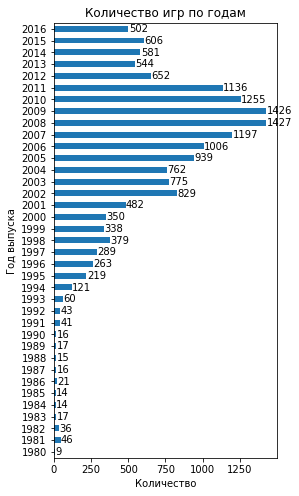

In [ ]:
game_count = (
    df.query('year_of_release != -1')
    .groupby('year_of_release')['name']
    .count()
    .reset_index()
)

# Отсортировать данные по году выпуска
game_count_sorted = game_count.sort_values(by='year_of_release')

# Создаем объект для рисунка с заданным соотношением ширины и высоты
fig, ax = plt.subplots(figsize=(4, 8))  # Ширина: 8 дюймов, Высота: 4 дюйма
game_count_sorted.plot.barh(x='year_of_release', y='name', legend=False, ax=ax)

# Добавляем числовые значения на график
for i, v in enumerate(game_count_sorted['name']):
    ax.text(v + 3, i, str(v), color='black', va='center')

# Добавляем метки осей и заголовок
plt.xlabel('Количество')
plt.ylabel('Год выпуска')
plt.title('Количество игр по годам')

# Отображаем график
plt.show()

На графике мы можем видеть, что в период с 1980 по 1990, исключая 1981 и 1982, выпускалось крайне малое количество игр. Возможно в случае, если будет необходимо формулировать какие-либо статистически гипотезы относительно этих групп, то они окажутся недостаточными. Далее ознакомимся с аналогичным графиком, исключающим данные без возрастного рейтинга.

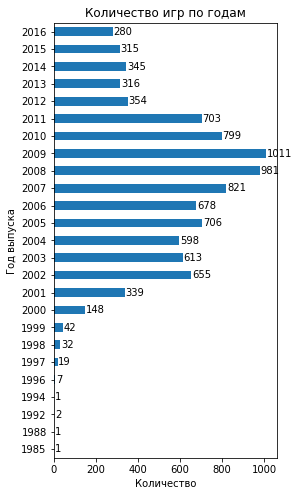

In [ ]:
game_count = (
    df.query('year_of_release != 0 and rating != "unknown"')
    .groupby('year_of_release')['name']
    .count()
    .reset_index()
)
# Отсортировать данные по году выпуска
game_count_sorted = game_count.sort_values(by='year_of_release')

# Создаем объект для рисунка с заданным соотношением ширины и высоты
fig, ax = plt.subplots(figsize=(4, 8))
game_count_sorted.plot.barh(x='year_of_release', y='name', legend=False, ax=ax)

# Добавляем числовые значения на график
for i, v in enumerate(game_count_sorted['name']):
    ax.text(v + 3, i, str(v), color='black', va='center')

# Добавляем метки осей и заголовок
plt.xlabel('Количество')
plt.ylabel('Год выпуска')
plt.title('Количество игр по годам')

# Отображаем график
plt.show()

На этом графике мы также наблюдаем крайне малые категории в промежутке между 1985 по 1997. С 1980 до 1985 годы категории вовсе отсутсвуют.

Общая тенденция, которая наблюдается для обоих графикох, заключается в том, что с 2002 по 2011 было создано наибольшее количество игр. Максимальное количество игр с игровым рейтингом выпущено в 2009 году.

**Вывод:**
- Больше всего игр выпущенно в период с 2002 по 2011.
- Самый продуктивным годом является 2009.
- В период с 1980 по 1990 игр выпущено крайне мало.

##### Как менялись продажи по платфомам

In [ ]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown,31.38


Для начала найдем суммарные продажи по платформам, отсортируем их по возрастанию и выведем первые 10.

In [ ]:
df.groupby('platform')['sales'].sum().sort_values(ascending = False).head(10)

platform
PS2     1233.56
X360     961.24
PS3      931.33
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: sales, dtype: float64

Теперь когда мы знаем на каких платформах было продано больше всего игр, построим распределения по годам и сравним их.

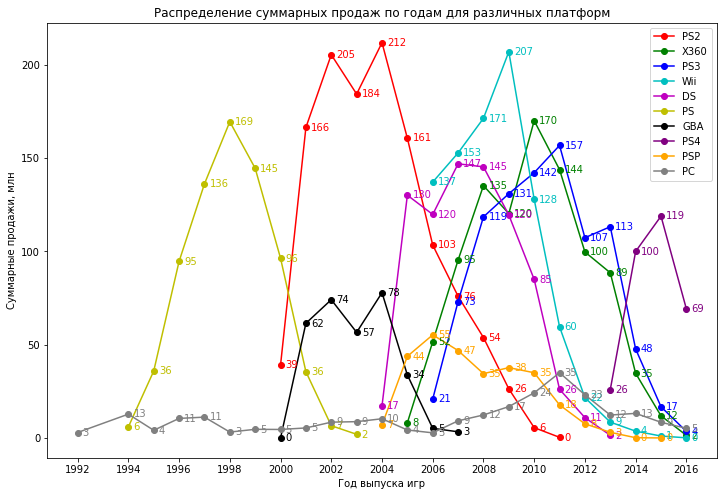

In [ ]:
# Выбираем данные для указанных платформ
platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']
platform_sales = df[(df['platform'].isin(platforms)) & (df['year_of_release'] != 0) & (df['year_of_release'] > 1990)]

# Определим цвета для каждой платформы
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'purple', 'orange', 'gray']

# Группируем данные по году и платформе, суммируем общие продажи
platform_yearly_sales = platform_sales.groupby(['platform', 'year_of_release'])['sales'].sum().reset_index()

# Задаем размер графика
fig, ax = plt.subplots(figsize=(12, 8))

# Строим распределение по годам для каждой платформы
for idx, platform in enumerate(platforms):
    platform_data = platform_yearly_sales[platform_yearly_sales['platform'] == platform]
    ax.plot(platform_data['year_of_release'], platform_data['sales'], marker='o', linestyle='-', color=colors[idx], label=platform)
    # Добавим числовые значения на точки (округленные до целых)
    for i, v in enumerate(platform_data['sales']):
        ax.text(platform_data['year_of_release'].iloc[i] + 0.2, v, str(round(v)), color=colors[idx], va='center')

# Установим количество отображаемых значений на оси x
ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=15))

# Добавляем метки осей и легенду
plt.xlabel('Год выпуска игр')
plt.ylabel('Суммарные продажи, млн')
plt.title('Распределение суммарных продаж по годам для различных платформ')
plt.legend()
plt.show()

Итак, для отвеча на вопрос "За какой характерный срок появляются новые и исчезают старые платформы?" акцентируем внимание на следующем: начало роста продаж платформы, достижение максимума, начало спада. На основании этого можно будет сделать вывод о сроке появления новых и исчезновения старых платформ.

Для начала обратимся к серии PS.<br>
- PS начала набирать популярность в 1994 и начала терять ее в 1999 году (падать за 6 лет, максимальная популярность за 5).
- Через год начала набирать популярность PS2 и начала терять ее в 2005 (падать за 6 лет, максимальная популярность за 5).
- Еще через год после этого PS3 начала набирать популярность и в 2012 резко пошла вниз (падать за 7 лет, максимальная популярность за 6).
- На следующий год PS4 взяла инициативу в свои руки и достигла локального максимума за 3 года.

Теперь остальные платформы.<br>
- PC 19 лет до пика популярности.(уникальный случай. В целом довольно стабильно остается популярной с самого начала.)
- GBA достигла пика за 5 лет и на 6 год начала падать.
- PSP достигла пика за 3 года и начала падать на четвертый.
- DS достигла пика за 4 года на 5 год начала падать.
- X360 достигла пика за 6 лет и начала падать на 7 год.(похоже на PS3).
- Wii пик за 4 года, спад на 5 год.

**Общий вывод:**<br>
Исходя из предоставленных данных, мы видим, что общий характерный срок появления новых и исчезновения старых платформ составляет около 5-6 лет с пика популярности до начала спада. Этот срок варьируется в зависимости от конкретной платформы, но в целом можно заключить, что жизненный цикл игровых платформ составляет примерно 5-6 лет.

##### Выделение данных за соответствующий актуальный период

Входе предыдущего пункта, мы выявили, что акутальный период платфоры составляет 5-6 лет. Будем считать, что акуальный период это период с 2012 года. Причина заключается в том, что большое количество популярных платформ было выпущено с 2004 по 2006, если прибавить 6 лет, то получается 2012. Именно в этот год предположительно должны были начать появляться новые популярные платформы, однко мы видим, что после 2012 только PS4 имеет высокую популярность, а остальные стагнируют, что наводит на мысли о том, что популярность игровых платформ вцелом упала, а компании больше не видят перспектив в разработке. Однако это невозможно определить с помощью текущих данных.

Так или иначе. Сформируем данные за актуальный период, не учитывая другие года.

In [ ]:
df_actual = df.query('year_of_release >= 2012')
df_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


**Вывод:**
- Выявлен актуальный временной период для прогноза следующего года.
- Сформирован датасет с актуальными данными.

##### Какие платформы лидируют по продажам, растут или падают

Сформируем список платформ, по которым будем выводить продажи по годам, а также цветовую политру для отображения.

In [ ]:
platforms = df_actual['platform'].unique()
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'purple', 'orange', 'gray', 'darkolivegreen']

Построим распределения по годам и сравним их.

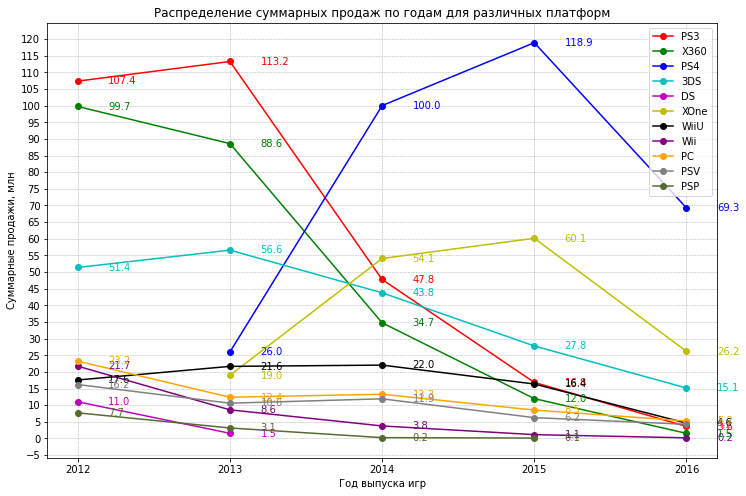

In [ ]:
# Группируем данные по году и платформе, суммируем общие продажи
platform_yearly_sales = df_actual.groupby(['platform', 'year_of_release'])['sales'].sum().reset_index()

# Задаем размер графика
fig, ax = plt.subplots(figsize=(12, 8))

# Строим распределение по годам для каждой платформы
for idx, platform in enumerate(platforms):
    platform_data = platform_yearly_sales[platform_yearly_sales['platform'] == platform]
    ax.plot(platform_data['year_of_release'], platform_data['sales'], marker='o', linestyle='-', color=colors[idx], label=platform)
    # Добавим числовые значения на точки (округленные до целых)
    for i, v in enumerate(platform_data['sales']):
        ax.text(platform_data['year_of_release'].iloc[i] + 0.2, v, str(round(v,1)), color=colors[idx], va='center')

# Установим количество отображаемых значений на оси x
ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=5))
# Добавляем размерную сетку
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
# Установим количество отображаемых значений на оси y
ax.yaxis.set_major_locator(plt.MaxNLocator(nbins=30))

# Добавляем метки осей и легенду
plt.xlabel('Год выпуска игр')
plt.ylabel('Суммарные продажи, млн')
plt.title('Распределение суммарных продаж по годам для различных платформ')
plt.legend()
plt.show()

**Вывод:**
- Среди перечисленных платформ нет тех, которые росли бы. Однако можно выделить PS4, XOne, 3DS. Эти платформы относятся к актуальному периоду и предположительно будут показывать хорошие продажи следующие 2 года.

##### Посторения графика "ящик с усами" по глобальным продажам игр в разбивке по платформам

Построим распределение суммарных продаж по годам для различных платформ.

In [ ]:
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'brown', 'purple', 'orange', 'gray', 'darkolivegreen']

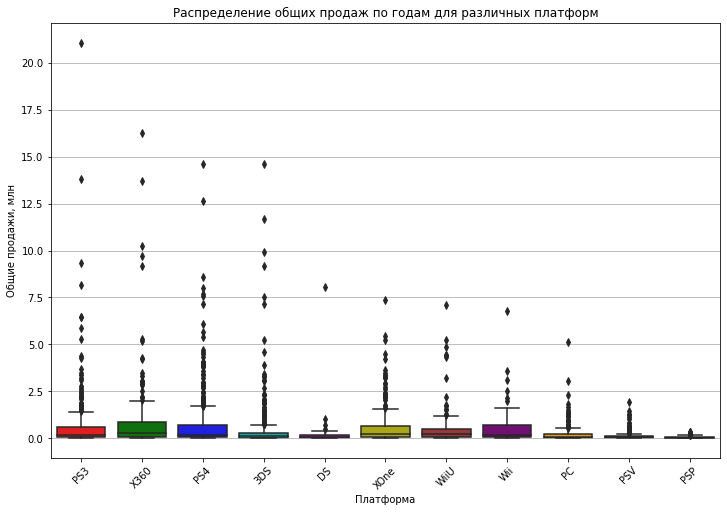

In [ ]:
# Cоздаем график "ящик с усами"
plt.figure(figsize=(12, 8))
#sns.boxplot(data=platform_yearly_sales, x='platform', y='sales', palette=colors)
sns.boxplot(data=df_actual, x='platform', y='sales', palette=colors)

# Устанавливаем количество отображаемых значений на оси Y
plt.yticks(np.arange(0, df_actual['sales'].max(), step=2.5))
# Добавляем горизонтальную сетку
plt.grid(axis='y')

plt.xlabel('Платформа')
plt.ylabel('Общие продажи, млн')
plt.title('Распределение общих продаж по годам для различных платформ')
plt.xticks(rotation=45)
plt.show()

Для наглядкости изменим масштаб и построим еще раз.

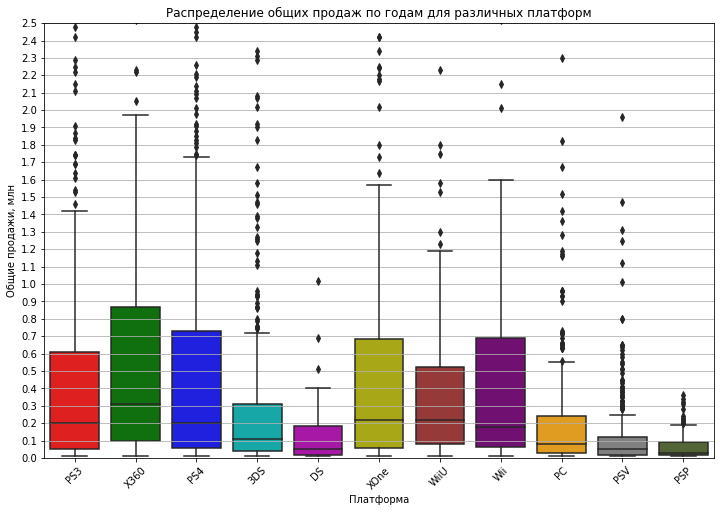

In [ ]:
# Cоздаем график "ящик с усами"
plt.figure(figsize=(12, 8))
#sns.boxplot(data=platform_yearly_sales, x='platform', y='sales', palette=colors)
sns.boxplot(data=df_actual, x='platform', y='sales', palette=colors)

# Устанавливаем количество отображаемых значений на оси Y
plt.yticks(np.arange(0, platform_yearly_sales['sales'].max(), step=0.1))
# Добавляем горизонтальную сетку
plt.grid(axis='y')

plt.ylim(0, 2.5)

plt.xlabel('Платформа')
plt.ylabel('Общие продажи, млн')
plt.title('Распределение общих продаж по годам для различных платформ')
plt.xticks(rotation=45)
plt.show()

 **Выводы:**
- За актуальный период можно выделить X360 так как его медианное значения самое высокое.
- PS4, PS3, XOne, WiiU, Wii судя по медианным значениям, находятся примерно на одном уровне продаж.
- PS4, PS3, X360, XOne, Wii выделятся большим разбросом продаж, судя по длинне усов.
- Все платформы  в актульный период имели аномально прибыльные периоды, судя по точкам, находящимися за концами усов.

##### Как влияют на продажи внутри одной популярной платфрмы отзывы пользователей и критиков

Так как PS4 выглядит наиболее перспективной, то выберем данные только для платформы PS4

In [ ]:
ps4_data_no_critic = df_actual.query('platform == "PS4" and critic_score != -1')
ps4_data_no_user = df_actual.query('platform == "PS4" and user_score != -1')

Создадим диаграмму рассеяния для отзывов критиков и продаж

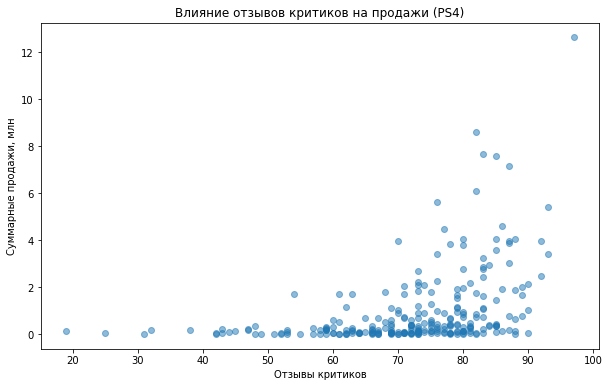

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(ps4_data_no_critic['critic_score'], ps4_data_no_critic['sales'], alpha=0.5)
plt.title('Влияние отзывов критиков на продажи (PS4)')
plt.xlabel('Отзывы критиков')
plt.ylabel('Суммарные продажи, млн')
plt.show()

Связь наблюдается очень слабо при высоких показателях отзывов. Теперь посмотрим относительно отзывов пользователей.

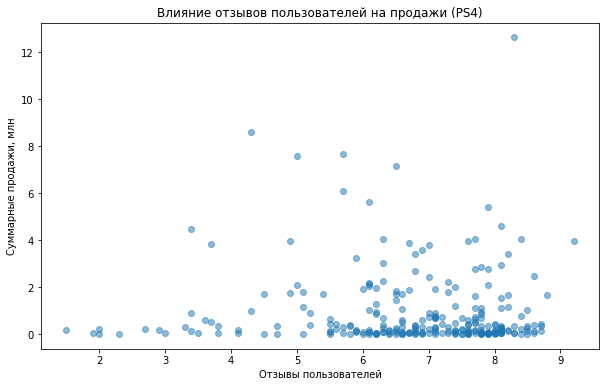

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(ps4_data_no_user['user_score'], ps4_data_no_user['sales'], alpha=0.5)
plt.title('Влияние отзывов пользователей на продажи (PS4)')
plt.xlabel('Отзывы пользователей')
plt.ylabel('Суммарные продажи, млн')
plt.show()

Никакой связи не наблюдается. Теперь посчитаем корреляции.

Корреляцию между отзывами критиков и продажами.

In [ ]:
ps4_data_no_critic['critic_score'].corr(ps4_data_no_critic['sales'])

0.40656790206178095

Корреляцию между отзывами пользователей и продажами.

In [ ]:
ps4_data_no_user['user_score'].corr(ps4_data_no_user['sales'])

-0.031957110204556376

**Выводы:**
- Существует малая положительная связь между отзывами критиков и продажами, что указывает на то, что более высокие оценки критиков связаны с более высокими продажами, но крайне слабо.
- Корреляция между отзывами пользователей и продажами почти отсутствует, что говорит о том, что нет четкой связи между оценками пользователей и уровнем продаж.

##### Соотнесение выводов с продажи игр на других платформах

In [ ]:
platforms = ['X360', 'PS3', 'Wii', 'WiiU', 'XOne']

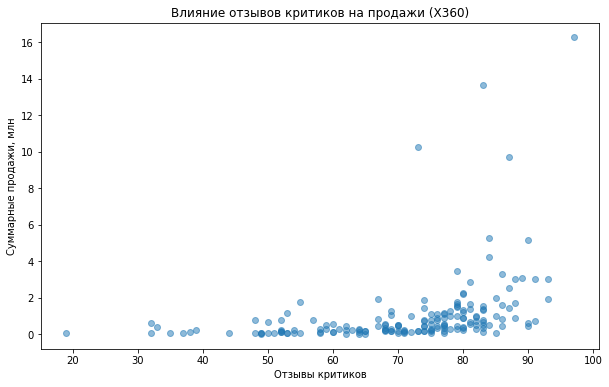

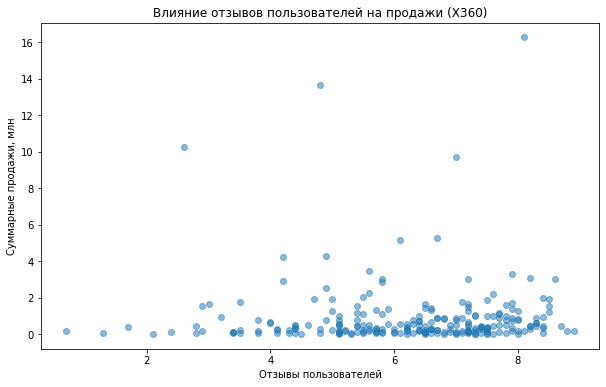

Корреляция между отзывами критиков и продажами (X360): 0.3605734888507336
Корреляция между отзывами пользователей и продажами (X360): 0.006163978646213326


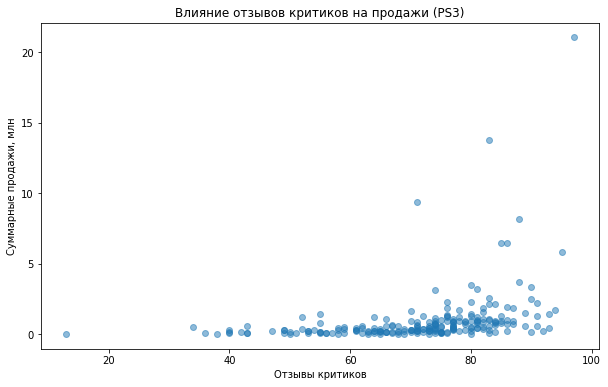

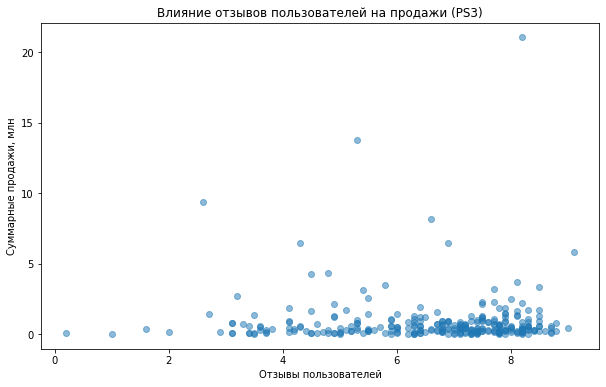

Корреляция между отзывами критиков и продажами (PS3): 0.3341517575509856
Корреляция между отзывами пользователей и продажами (PS3): -0.006205767686051523


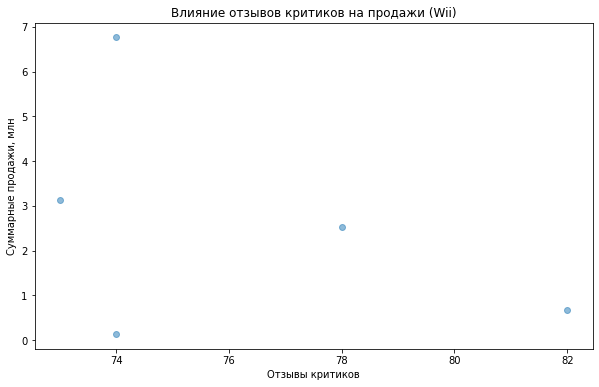

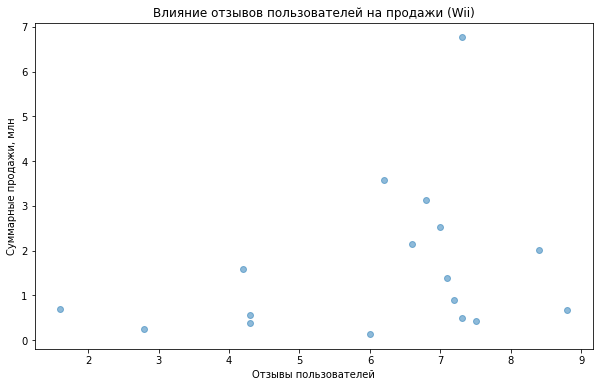

Корреляция между отзывами критиков и продажами (Wii): -0.4243413011077494
Корреляция между отзывами пользователей и продажами (Wii): 0.29619680007479526


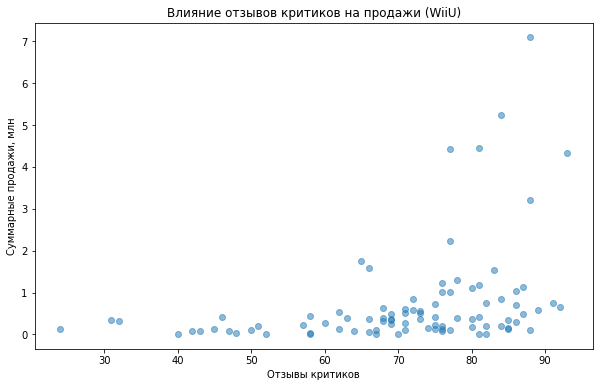

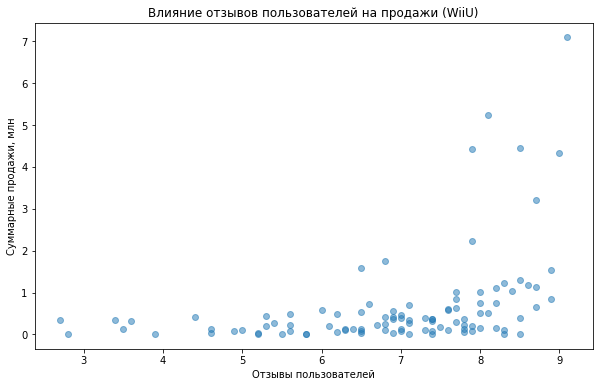

Корреляция между отзывами критиков и продажами (WiiU): 0.34837976012017485
Корреляция между отзывами пользователей и продажами (WiiU): 0.4002190202148617


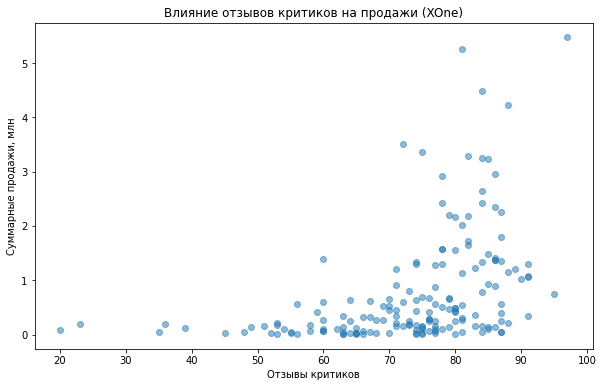

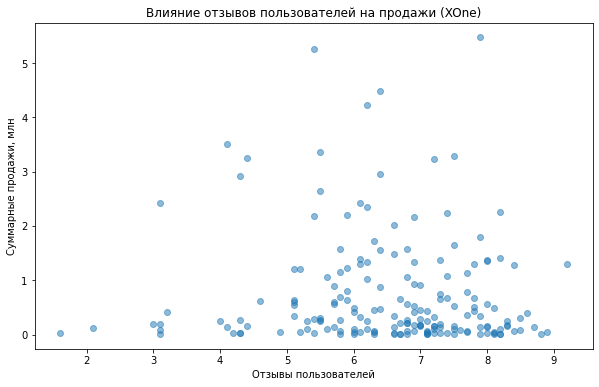

Корреляция между отзывами критиков и продажами (XOne): 0.4169983280084017
Корреляция между отзывами пользователей и продажами (XOne): -0.06892505328279414


In [ ]:
for platform in platforms:
    platform_data_critic = df_actual.query('platform == @platform and critic_score != -1')
    platform_data_user = df_actual.query('platform == @platform and user_score != -1')

    # Диаграмма рассеяния для отзывов критиков
    plt.figure(figsize=(10, 6))
    plt.scatter(platform_data_critic['critic_score'], platform_data_critic['sales'], alpha=0.5)
    plt.title(f'Влияние отзывов критиков на продажи ({platform})')
    plt.xlabel('Отзывы критиков')
    plt.ylabel('Суммарные продажи, млн')
    plt.show()

    # Диаграмма рассеяния для отзывов пользователей
    plt.figure(figsize=(10, 6))
    plt.scatter(platform_data_user['user_score'], platform_data_user['sales'], alpha=0.5)
    plt.title(f'Влияние отзывов пользователей на продажи ({platform})')
    plt.xlabel('Отзывы пользователей')
    plt.ylabel('Суммарные продажи, млн')
    plt.show()

    # Корреляция отзывов критиков и отзывов пользователей с продажами
    critic_sales_corr = platform_data_critic['critic_score'].corr(platform_data_critic['sales'])
    user_sales_corr = platform_data_user['user_score'].corr(platform_data_user['sales'])
    print(f'Корреляция между отзывами критиков и продажами ({platform}): {critic_sales_corr}')
    print(f'Корреляция между отзывами пользователей и продажами ({platform}): {user_sales_corr}')

**Вывод:**
- Общая тенденция касательно того, что отзывы критиков мало коррелируют с объемом общих продаж, остается актуальной и для других платформ. Так как корреляция не привышает 0.42.
- Четкой связи между оценками пользователей и уровнем продаж нет и на других платформах, но есть исключения, в которых эта корреляция выражена слабо.

##### Общее распределение игр по жанрам

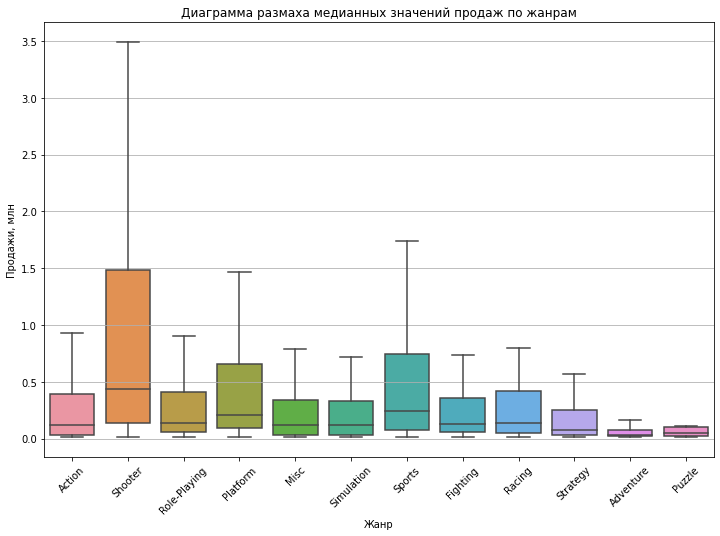

In [ ]:
# Построение диаграммы размаха для анализа медианных значений продаж по жанрам
plt.figure(figsize=(12, 8))
sns.boxplot(x='genre', y='sales', data=df_actual, showfliers=False)

# Добавляем горизонтальную сетку
plt.grid(axis='y')

plt.title('Диаграмма размаха медианных значений продаж по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Продажи, млн')
plt.xticks(rotation=45)
plt.show()

**Общий вывод:**<br>
- Shooter является жанром с наибольшим средним по общим продажам и в некоторых случаях количество продаж может быть очень большим, судя по усам ящика.
- Такжже можно выделить Sports и Platform, которые уступают по показателям Shooter, но тоже относительно велики.

#### Составление портретов пользователей каждого региона

In [ ]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown,31.38


##### Самые популярные платформы (топ-5). Описание различия в долях продаж.

Сгруппируем продажи в каждом регионе по платформам, затем найдем доли в процентах и оставим 5 самых популярных.

Северная Америка

In [ ]:
na_info = df_actual.groupby('platform')['na_sales'].sum().sort_values(ascending = False)
na_info = na_info.apply(lambda x: (x / na_info.sum()) * 100).head()
na_info

platform
X360    23.698326
PS4     18.400257
PS3     17.493274
XOne    15.757145
3DS      9.359189
Name: na_sales, dtype: float64

**Вывод:**
  - Большую часть продаж в Северной Америке занимают платформы X360, PS4 и PS3, с небольшим отрывом от XOne и 3DS.

Европа

In [ ]:
eu_info = df_actual.groupby('platform')['eu_sales'].sum().sort_values(ascending = False)
eu_info = eu_info.apply(lambda x: (x / eu_info.sum()) * 100).head()
eu_info

platform
PS4     27.838835
PS3     21.082852
X360    14.703735
XOne    10.179357
3DS      8.413409
Name: eu_sales, dtype: float64

**Вывод:**
  - PS4 и PS3 являются лидерами продаж в Европе, при этом X360 и XOne занимают значительную долю.

Япония

In [ ]:
jp_info = df_actual.groupby('platform')['jp_sales'].sum().sort_values(ascending = False)
jp_info = jp_info.apply(lambda x: (x / jp_info.sum()) * 100).head()
jp_info

platform
3DS     45.586250
PS3     18.324852
PSV     10.925330
PS4      8.287465
WiiU     6.755634
Name: jp_sales, dtype: float64

**Вывод:**
  - Очевидно, что на японском рынке преобладают отечественные платформы, при этом платформа 3DS занимает значительную долю продаж.

**Общие выводы:**
  - PS4 и PS3 являются общими лидерами для Европы и Северной Америки и Япония.
  - В Японии следует уделить внимание 3DS.

##### Самые популярные жанры (топ-5). Пояснение разницы.

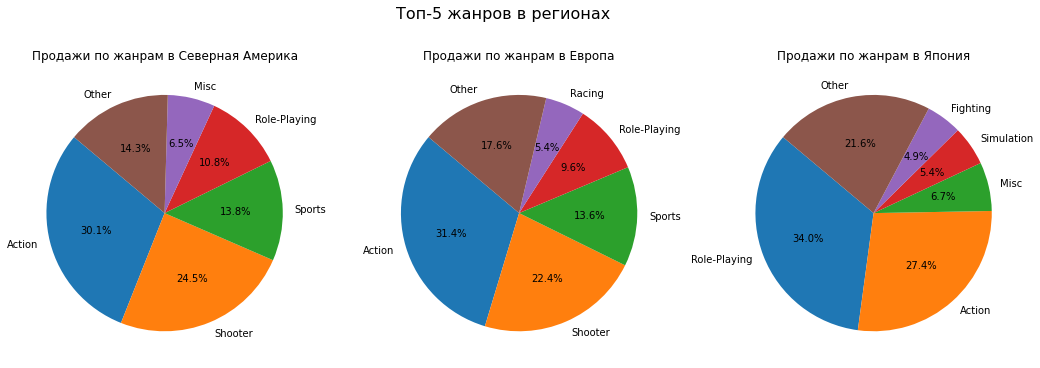

In [ ]:
# Создадим фигуру для всех диаграмм
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Список регионов и их меток для использования в цикле
regions = ['NA', 'EU', 'JP']
region_labels = ['Северная Америка', 'Европа', 'Япония']

for i, region in enumerate(regions):
    # Сгруппируем продажи по жанрам в текущем регионе
    region_genre_sales = df_actual.groupby('genre')[f'{region.lower()}_sales'].sum().sort_values(ascending=False)

    # Получим топ-5 самых популярных жанров
    top_5_genres_region = region_genre_sales.nlargest(5).index

    # Вычислим сумму продаж для остальных жанров
    other_sales_region = region_genre_sales.drop(top_5_genres_region).sum()

    # Создадим список с продажами для круговой диаграммы
    sales_to_plot = list(region_genre_sales.loc[top_5_genres_region]) + [other_sales_region]
    labels = top_5_genres_region.to_list() + ['Other']

    # Построим круговую диаграмму для текущего региона
    axes[i].pie(sales_to_plot, labels=labels, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'Продажи по жанрам в {region_labels[i]}')

# Добавим общее название рисунка
fig.suptitle('Топ-5 жанров в регионах', fontsize=16)
plt.show()

**Общий вывод:**
  - Во всех регионах лидирует Action, что свидетельствует о предпочтении к динамичным и более сложным играм.
  - Shooter также крайне популярен в Европе и Северной Америке.
  - В Японии наиболее популярен Role-Playing.
  - Разница в предпочтениях между Японией и остальными регионами связана с историческими и культурными особенностями региона, который многие века формировался в отрыве от европейской культуры.

##### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

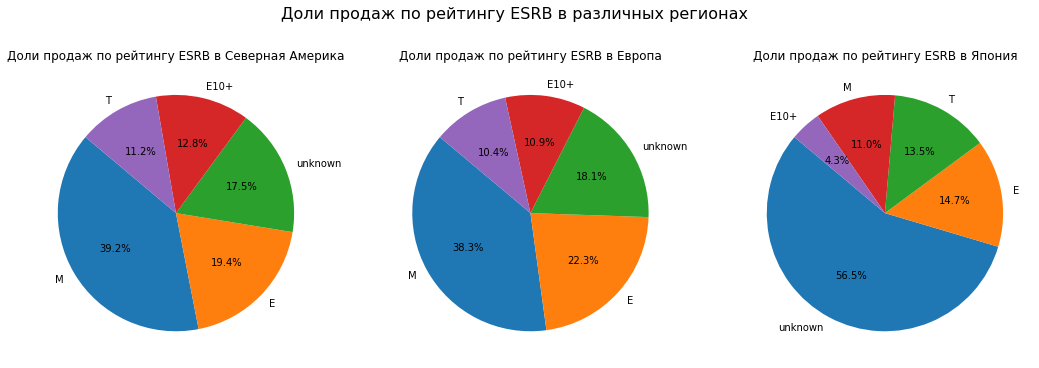

In [ ]:
# Создадим фигуру для всех диаграмм
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Список регионов и их меток для использования в цикле
regions = ['NA', 'EU', 'JP']
region_labels = ['Северная Америка', 'Европа', 'Япония']

for i, region in enumerate(regions):
    # Сгруппируем продажи по рейтингу ESRB в текущем регионе
    region_sales_by_rating = df_actual.groupby('rating')[f'{region.lower()}_sales'].sum().sort_values(ascending=False)

    # Рассчитаем процентные доли продаж по рейтингу ESRB
    total_sales = region_sales_by_rating.sum()
    sales_percentages = (region_sales_by_rating / total_sales) * 100

    # Построим круговую диаграмму для текущего региона
    axes[i].pie(sales_percentages, labels=sales_percentages.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'Доли продаж по рейтингу ESRB в {region_labels[i]}')

# Добавим общее название рисунка
fig.suptitle('Доли продаж по рейтингу ESRB в различных регионах', fontsize=16)
plt.show()

**Общий вывод:**
  - Самый популярный рейтинг M в Северной Америке и Европе.
  - В Японии самый популярный жанр без рейтинга. Это связано с тем, что много игр Япония выпускает только для внутреннего рынка, даже не локализуя их на другие языке, поэтому и рейтинг ESRB получать нет смысла.
  - Считаю целесообразным рассмотреть рейтинг E как общепопулярный для всех регионов. В каждом регионе занимает вторые места.

#### Проверка гипотез

In [ ]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown,31.38


##### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Для решения этой задачи сформулируем нулевую и альтернативную гипотезу.<br>
Нулевая гипотеза `H0` будет следующая: "**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**"<br>
Альтернативная двусторонняя гипотеза `H1` будет звучать так:"**Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые**"<br>

Далее нам нужно сформировать данные о средних пользовательских рейтингах платформ Xbox One и PC

In [ ]:
xbox_one = df_actual.query('platform == "XOne" and user_score != -1')['user_score']
pc = df_actual.query('platform == "PC" and user_score != -1')['user_score']

Теперь проверим размер выборок.

In [ ]:
xbox_one.shape[0]

182

In [ ]:
pc.shape[0]

206

Теперь зададим уровень значимости.

In [ ]:
alpha = 0.01

Далее выполним двусторонний t-тест для проверки гипотезы, где:<br>
* `xbox_one` и `pc` - выборки,<br>
* `equal_var=True` - так как размер выборок не сильно отличается,<br>
* `alternative = 'two-sided'` - задаем двустороннюю альтернативную гипотезу.

In [ ]:
results = st.ttest_ind(
    xbox_one,
    pc,
    equal_var=True,
    alternative = 'two-sided')

Далее совершаем проверку гепотиз.

In [ ]:
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


**Вывод:**
- При высокой точностью alpha подтвердить то, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, не удалось.

##### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Для решения этой задачи сформулируем нулевую и альтернативную гипотезу.<br>
Нулевая гипотеза `H0` будет следующая: "**Средние пользовательские рейтинги жанров Action и Sports равны**"<br>
Альтернативная двусторонняя гипотеза `H1` будет звучать так:"**Средние пользовательские рейтинги жанров Action и Sports разные**"<br>

В данной задаче, мы предполагаем сравнивать средние пользовательские рейтинги для двух разных жанров (Action и Sports), и поэтому t-критерий для независимых выборок будет подходящим критерием для проверки гипотезы о равенстве средних.

Далее нам нужно сформировать данные о средних пользовательских рейтингах жанров Action и Sports.

In [ ]:
action = df.query('genre == "Action" and user_score != -1')['user_score']
sports = df.query('genre == "Sports" and user_score != -1')['user_score']

Теперь проверим размер выборок.

In [ ]:
action.shape[0]

1796

In [ ]:
sports.shape[0]

1080

Теперь зададим уровень значимости.

In [ ]:
alpha = 0.01

Далее выполним двусторонний t-тест для проверки гипотезы, где:<br>
* `action` и `sports` - выборки,<br>
* `equal_var=False` - так как размер выборок отличается,<br>
* `alternative = 'two-sided'` - задаем двустороннюю альтернативную гипотезу.

In [ ]:
results = st.ttest_ind(
    action,
    sports,
    equal_var=False,
    alternative = 'two-sided')

Далее совершаем проверку гепотиз.

In [ ]:
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.07751671595536253
Не получилось отвергнуть нулевую гипотезу


**Вывод:**
- Средние пользовательские рейтинги жанров Action и Sports вероятнее равны чем не равны.

**Вывод по гипотезам:**
- Сравниваются средние двух генеральных совокупностей между собой. Когда сравнивают средние двух генеральных совокупностей, нулевую гипотезу можно сформулировать так: «средние значения совокупностей равны». Так как вопрос стоит о равенстве средних рейтингов или неравенстве, то формулировать левосторонню или правосторонню альтернативную гипотезу не нужно. Если бы вопрос стоял в том, больше или меньше одно другого, тогда была бы сфромулирован не двусторонняя гипотиза. Т-критерий предполагает, что данные имеют нормальное распределение, и он чувствителен к отклонениям от нормальности. В данном случае, мы можем предположить, что пользовательские рейтинги могут иметь нормальное распределение.

#### Общий вывод

1. Проведен анализ и подготовка данных, включая проверку на ошибки, преобразование типов, обработку пропусков и подсчет суммарных продаж во всех регионах.
2. Исследован рынок компьютерных игр и платформ, определен актуальный временной период для прогноза и составлен датасет с актуальными данными.
3. Определены потенциально успешные игровые платформы и прибыльные жанры.
4. Сформулированы портреты пользователей каждого региона, выявлены различия в предпочтениях и рекомендовано учитывать региональные особенности при планировании рекламных кампаний.
5. Установлено влияние рейтинга ESRB на продажи игр в различных регионах.

#### Рекомендации

- Рекламировать игры на платформах PS4 и PS3 во всех регионах, так как они являются общими лидерами.
- Рекламировать Shooter рейтинга M в Северной Америке и Европе, так как жанр самый прибыльный и популярный в этих регионах, а возрастной рейтинг также самый популярный.
- Рекламировать жанр Action категории E, так как этот жанр и возрастной рейтинг актуален во всех регионах, хоть и имеет не такую высокую прибыль как Shooter.
- Оценки пользователей не влияют на продажи.
- Высокие оценки критиков могут положительно сказываться на продажах.